<a href="https://colab.research.google.com/github/fnmelo/DL4Proteins-notebooks/blob/main/notebooks/WS02_NeuralNetworksWithPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color='#569098' size=20>Neural Networks with PyTorch</font>**

##[Return to HomePage](https://github.com/Graylab/DL4Proteins-notebooks)

Tutorial adapted and images copied from Harrison Kinsley of [sentdex](https://www.youtube.com/@sentdex)

**OBJECTIVES: By the end of this workshop you should be able to:**

* <font color='#e59454'>Define and instantiate a neural network model with PyTorch</font>
* <font color='#e59454'>Define and execute a training loop for a multi-class classification task</font>
* <font color='#e59454'>Visualize the learned classification landscape of the neural network</font>

**_To save your work, please save a copy of this notebook into your  personal google drive._**


**<font color='#569098' size = 5> Table of Contents </font>**

**[Section 1: Defining model](https://colab.research.google.com/drive/1Ic0lWZqSR4BhwuVNXUyFr92hOShh01z6#scrollTo=sXC95X1SznTH)**

* Define neural network class
* Create spiral multi-class classification dataset
* Instantiate model, loss function, and optimizer

**[Section 2: Training](https://colab.research.google.com/drive/1Ic0lWZqSR4BhwuVNXUyFr92hOShh01z6#scrollTo=-e2rJZKOH0Yd)**

* Correctly place loss, optimizer, and accuracy calculation training loop

**[Section 3: Performance](https://colab.research.google.com/drive/1Ic0lWZqSR4BhwuVNXUyFr92hOShh01z6#scrollTo=85as_3Fl5JIQ)**

* Plot a mesh representation of the learned classification bins

### <b> <font color='#569098'> Import Libraries

In [1]:
!pip install nnfs

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

# <b> <font color='#569098'> Section 1: Defining model

Whereas in the previous notebook we needed 7 classes to define components of our model, below is all we need when using PyTorch!

In [ ]:
# custom NN inheriting from nn.Module
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()
    # first dense (fully connected) layer with 2 input features, 64 output neurons
    self.dense1 = nn.Linear(2, 64)
    # define activation function (ReLU) for first hidden layer
    self.relu1 = nn.ReLU()
    # # second desne layer with 64 input neurons, 3 output neurons
    self.dense2 = nn.Linear(64, 3)

  # forward pass
  # computes output of model given input data x
  def forward(self, x):
    # pass input x through first dense layer
    x = self.dense1(x)
    # apply ReLU activation function to output of first dense layer
    x = self.relu1(x)
    # pass output of ReLU activation function through second dense layer
    x = self.dense2(x)
    # return output of second dense layer
    return x


## **<font color='#569098'>Creating dataset**
We will be training a neural network to predict the color of a point (y $ϵ$ $\{$green, red, or blue $\}$ ) given an input $X$ of two descripitive features (the x and y coordinates)

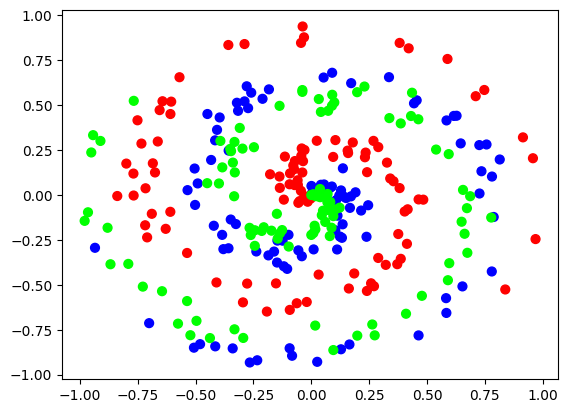

In [19]:
# generate data for a classification task
X, y = spiral_data(samples=100, classes=3)

# convert dataset to pytorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# visualize dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')


## **<font color='#569098'>Instantiating model**

We will be using a feedforward neural network consisting of two dense (fully connected) layers with ReLU activation, where the first layer takes 2 input features and outputs 64 neurons, and the second layer takes 64 neurons and outputs 3 neurons.

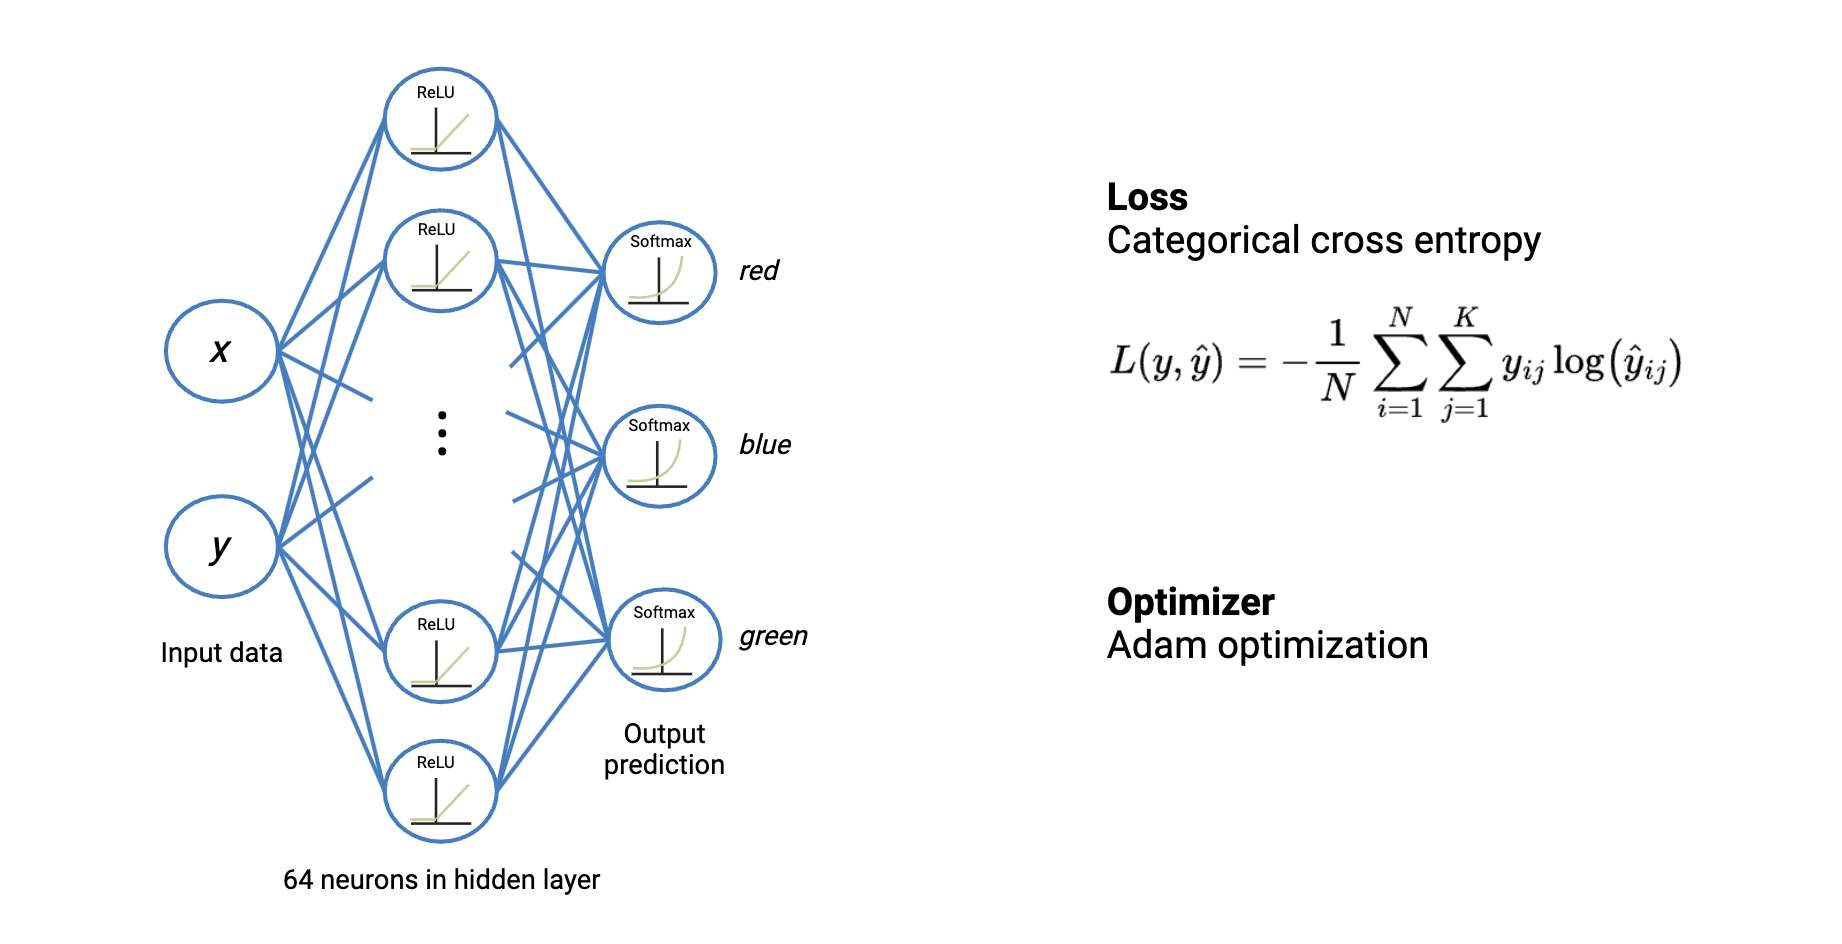

In [ ]:
# Define the model
model = MyModel()

# Loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.05, weight_decay=5e-7)

# <b> <font color='#569098'> Section 2: Training

In [ ]:
# Train in loop
for epoch in range(10001):
    # Forward pass
    outputs = model(X)

    # Calculate the loss
    loss = loss_function(outputs, y)

    # Zero gradients, backward pass, and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y).float().mean()

    # Print epoch, accuracy, loss, learning rate every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Accuracy: {accuracy.item():.3f}, Loss: {loss.item():.3f}, Learning Rate: {optimizer.param_groups[0]["lr"]}')


Epoch: 0, Accuracy: 0.347, Loss: 1.095, Learning Rate: 0.05
Epoch: 100, Accuracy: 0.787, Loss: 0.525, Learning Rate: 0.05
Epoch: 200, Accuracy: 0.857, Loss: 0.360, Learning Rate: 0.05
Epoch: 300, Accuracy: 0.887, Loss: 0.280, Learning Rate: 0.05
Epoch: 400, Accuracy: 0.900, Loss: 0.238, Learning Rate: 0.05
Epoch: 500, Accuracy: 0.917, Loss: 0.212, Learning Rate: 0.05
Epoch: 600, Accuracy: 0.917, Loss: 0.198, Learning Rate: 0.05
Epoch: 700, Accuracy: 0.927, Loss: 0.188, Learning Rate: 0.05
Epoch: 800, Accuracy: 0.927, Loss: 0.182, Learning Rate: 0.05
Epoch: 900, Accuracy: 0.923, Loss: 0.174, Learning Rate: 0.05
Epoch: 1000, Accuracy: 0.890, Loss: 0.257, Learning Rate: 0.05
Epoch: 1100, Accuracy: 0.930, Loss: 0.166, Learning Rate: 0.05
Epoch: 1200, Accuracy: 0.930, Loss: 0.155, Learning Rate: 0.05
Epoch: 1300, Accuracy: 0.933, Loss: 0.147, Learning Rate: 0.05
Epoch: 1400, Accuracy: 0.937, Loss: 0.141, Learning Rate: 0.05
Epoch: 1500, Accuracy: 0.940, Loss: 0.137, Learning Rate: 0.05
Epoc

# <b> <font color='#569098'> Section 3: Performance

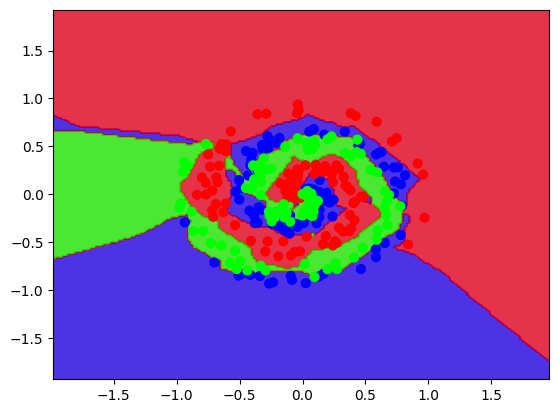

In [ ]:
# create meshgrid of points covering the feature space
h = 0.02
# determine min and max values for x,y axes
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# create meshgrid of points with spacing h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# convert meshgrid to torch tensor
meshgrid_points = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# pass meshgrid points through model
with torch.no_grad():
  # forward pass through first dense
  z1 = model.dense1(meshgrid_points)
  # apply relu activation
  a1 = torch.relu(z1)
  # forward pass through second dense
  z2 = model.dense2(a1)
  # compute softmax probabilities for each class
  exp_scores = torch.exp(z2 - torch.max(z2, axis=1, keepdim=True).values)
  probs = exp_scores / torch.sum(exp_scores, axis=1, keepdim=True)

# predictions
# determine predicted class for each point in meshgrid
_, predictions = torch.max(probs, axis=1)
# reshape predictions to match shape of meshgrid
Z = predictions.numpy().reshape(xx.shape)

# plot decision boundary based on predictions
plt.contourf(xx, yy, Z, cmap='brg', alpha=0.8)

# plot original data on top of decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
# plot limits set to match extent of meshgrid
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()


## **<font color='#569098'>1) Questions**

**Question**: What happens if you change the activation function of the hidden layer from ReLU to sigmoid in a neural network? Try this change and comment on the performance change.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [5]:
# custom NN inheriting from nn.Module
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()
    # first dense (fully connected) layer with 2 input features, 64 output neurons
    self.dense1 = nn.Linear(2, 64)
    # define activation function (ReLU) for first hidden layer
    self.relu1 = nn.Sigmoid()
    # # second desne layer with 64 input neurons, 3 output neurons
    self.dense2 = nn.Linear(64, 3)

  # forward pass
  # computes output of model given input data x
  def forward(self, x):
    # pass input x through first dense layer
    x = self.dense1(x)
    # apply ReLU activation function to output of first dense layer
    x = self.relu1(x)
    # pass output of ReLU activation function through second dense layer
    x = self.dense2(x)
    # return output of second dense layer
    return x


In [6]:
# Define the model
model = MyModel()

# Loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.05, weight_decay=5e-7)

In [7]:
# Train in loop
for epoch in range(10001):
    # Forward pass
    outputs = model(X)

    # Calculate the loss
    loss = loss_function(outputs, y)

    # Zero gradients, backward pass, and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y).float().mean()

    # Print epoch, accuracy, loss, learning rate every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Accuracy: {accuracy.item():.3f}, Loss: {loss.item():.3f}, Learning Rate: {optimizer.param_groups[0]["lr"]}')


Epoch: 0, Accuracy: 0.333, Loss: 1.107, Learning Rate: 0.05
Epoch: 100, Accuracy: 0.423, Loss: 1.079, Learning Rate: 0.05
Epoch: 200, Accuracy: 0.430, Loss: 1.044, Learning Rate: 0.05
Epoch: 300, Accuracy: 0.540, Loss: 0.952, Learning Rate: 0.05
Epoch: 400, Accuracy: 0.697, Loss: 0.700, Learning Rate: 0.05
Epoch: 500, Accuracy: 0.790, Loss: 0.534, Learning Rate: 0.05
Epoch: 600, Accuracy: 0.843, Loss: 0.419, Learning Rate: 0.05
Epoch: 700, Accuracy: 0.890, Loss: 0.319, Learning Rate: 0.05
Epoch: 800, Accuracy: 0.907, Loss: 0.252, Learning Rate: 0.05
Epoch: 900, Accuracy: 0.927, Loss: 0.208, Learning Rate: 0.05
Epoch: 1000, Accuracy: 0.933, Loss: 0.179, Learning Rate: 0.05
Epoch: 1100, Accuracy: 0.943, Loss: 0.159, Learning Rate: 0.05
Epoch: 1200, Accuracy: 0.953, Loss: 0.144, Learning Rate: 0.05
Epoch: 1300, Accuracy: 0.953, Loss: 0.132, Learning Rate: 0.05
Epoch: 1400, Accuracy: 0.963, Loss: 0.123, Learning Rate: 0.05
Epoch: 1500, Accuracy: 0.963, Loss: 0.114, Learning Rate: 0.05
Epoc

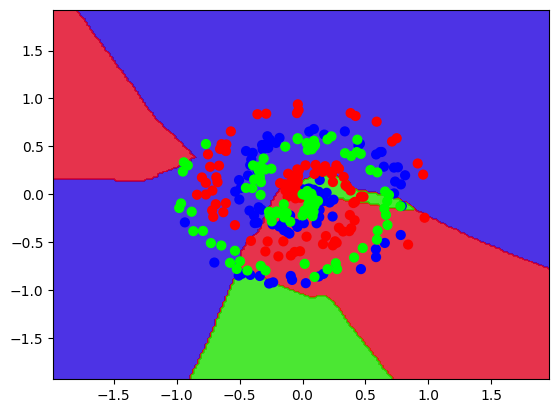

In [8]:
# create meshgrid of points covering the feature space
h = 0.02
# determine min and max values for x,y axes
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# create meshgrid of points with spacing h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# convert meshgrid to torch tensor
meshgrid_points = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# pass meshgrid points through model
with torch.no_grad():
  # forward pass through first dense
  z1 = model.dense1(meshgrid_points)
  # apply relu activation
  a1 = torch.relu(z1)
  # forward pass through second dense
  z2 = model.dense2(a1)
  # compute softmax probabilities for each class
  exp_scores = torch.exp(z2 - torch.max(z2, axis=1, keepdim=True).values)
  probs = exp_scores / torch.sum(exp_scores, axis=1, keepdim=True)

# predictions
# determine predicted class for each point in meshgrid
_, predictions = torch.max(probs, axis=1)
# reshape predictions to match shape of meshgrid
Z = predictions.numpy().reshape(xx.shape)

# plot decision boundary based on predictions
plt.contourf(xx, yy, Z, cmap='brg', alpha=0.8)

# plot original data on top of decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
# plot limits set to match extent of meshgrid
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()


In [9]:
#@markdown <font color='#e59454'>Run to See Answer!</font>

print('\n ReLU outperforms sigmoid. \n ReLU mitigates the vanishing gradient problem by allowing gradients to flow for positive inputs. \n Sigmoid will lead to poorer convergence due to the smaller effective gradient.')



 ReLU outperforms sigmoid. 
 ReLU mitigates the vanishing gradient problem by allowing gradients to flow for positive inputs. 
 Sigmoid will lead to poorer convergence due to the smaller effective gradient.


**Question**: What effect does changing the loss function from `CrossEntropyLoss` to `MeanSquaredError` have on the training of a classification model? Try this and remark on what happens.

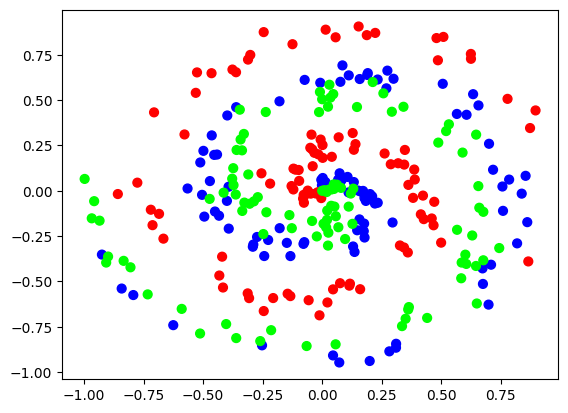

In [13]:
# generate data for a classification task
X, y = spiral_data(samples=100, classes=3)

# convert dataset to pytorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# visualize dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')


In [20]:
# custom NN inheriting from nn.Module
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()
    # first dense (fully connected) layer with 2 input features, 64 output neurons
    self.dense1 = nn.Linear(2, 64)
    # define activation function (ReLU) for first hidden layer
    self.relu1 = nn.ReLU()
    # # second desne layer with 64 input neurons, 3 output neurons
    self.dense2 = nn.Linear(64, 3)

  # forward pass
  # computes output of model given input data x
  def forward(self, x):
    # pass input x through first dense layer
    x = self.dense1(x)
    # apply ReLU activation function to output of first dense layer
    x = self.relu1(x)
    # pass output of ReLU activation function through second dense layer
    x = self.dense2(x)
    # return output of second dense layer
    return x


In [21]:
# Define the model
model = MyModel()

# Loss and optimizer
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.05, weight_decay=5e-7)

In [26]:
# Train in loop
for epoch in range(10001):
    # Forward pass
    outputs = model(X)


    # Convert target to one-hot encoding
    num_classes = 3  # Number of classes in your dataset
    y_onehot = torch.nn.functional.one_hot(y, num_classes=num_classes).float()

    # Calculate the loss

    loss = loss_function(outputs, y_onehot)

    # Zero gradients, backward pass, and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y).float().mean()

    # Print epoch, accuracy, loss, learning rate every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Accuracy: {accuracy.item():.3f}, Loss: {loss.item():.3f}, Learning Rate: {optimizer.param_groups[0]["lr"]}')


Epoch: 0, Accuracy: 0.337, Loss: 0.329, Learning Rate: 0.05
Epoch: 100, Accuracy: 0.653, Loss: 0.145, Learning Rate: 0.05
Epoch: 200, Accuracy: 0.780, Loss: 0.118, Learning Rate: 0.05
Epoch: 300, Accuracy: 0.827, Loss: 0.100, Learning Rate: 0.05
Epoch: 400, Accuracy: 0.833, Loss: 0.098, Learning Rate: 0.05
Epoch: 500, Accuracy: 0.847, Loss: 0.090, Learning Rate: 0.05
Epoch: 600, Accuracy: 0.863, Loss: 0.083, Learning Rate: 0.05
Epoch: 700, Accuracy: 0.860, Loss: 0.089, Learning Rate: 0.05
Epoch: 800, Accuracy: 0.863, Loss: 0.077, Learning Rate: 0.05
Epoch: 900, Accuracy: 0.887, Loss: 0.076, Learning Rate: 0.05
Epoch: 1000, Accuracy: 0.890, Loss: 0.073, Learning Rate: 0.05
Epoch: 1100, Accuracy: 0.893, Loss: 0.072, Learning Rate: 0.05
Epoch: 1200, Accuracy: 0.883, Loss: 0.073, Learning Rate: 0.05
Epoch: 1300, Accuracy: 0.893, Loss: 0.070, Learning Rate: 0.05
Epoch: 1400, Accuracy: 0.897, Loss: 0.069, Learning Rate: 0.05
Epoch: 1500, Accuracy: 0.903, Loss: 0.070, Learning Rate: 0.05
Epoc

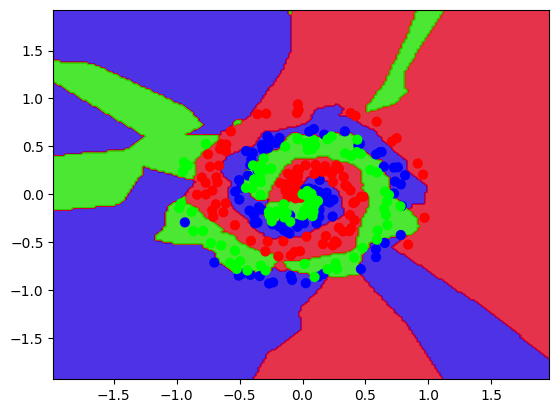

In [27]:
            # create meshgrid of points covering the feature space
h = 0.02
# determine min and max values for x,y axes
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# create meshgrid of points with spacing h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# convert meshgrid to torch tensor
meshgrid_points = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# pass meshgrid points through model
with torch.no_grad():
  # forward pass through first dense
  z1 = model.dense1(meshgrid_points)
  # apply relu activation
  a1 = torch.relu(z1)
  # forward pass through second dense
  z2 = model.dense2(a1)
  # compute softmax probabilities for each class
  exp_scores = torch.exp(z2 - torch.max(z2, axis=1, keepdim=True).values)
  probs = exp_scores / torch.sum(exp_scores, axis=1, keepdim=True)

# predictions
# determine predicted class for each point in meshgrid
_, predictions = torch.max(probs, axis=1)
# reshape predictions to match shape of meshgrid
Z = predictions.numpy().reshape(xx.shape)

# plot decision boundary based on predictions
plt.contourf(xx, yy, Z, cmap='brg', alpha=0.8)

# plot original data on top of decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
# plot limits set to match extent of meshgrid
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()


In [23]:
#@markdown <font color='#e59454'>Run to See Answer!</font>

print("\n Using MSE for classification results in worse performance. \n This is because MSE doesn't explicitly encourage the model to push the probability of the correct class to 1 while minimizing the others.")



 Using MSE for classification results in worse performance. 
 This is because MSE doesn't explicitly encourage the model to push the probability of the correct class to 1 while minimizing the others.


**Question**: How does using the SGD optimizer with a learning rate of 0.01 compare to using the Adam optimizer with a learning rate of 0.001?

In [28]:
# custom NN inheriting from nn.Module
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()
    # first dense (fully connected) layer with 2 input features, 64 output neurons
    self.dense1 = nn.Linear(2, 64)
    # define activation function (ReLU) for first hidden layer
    self.relu1 = nn.ReLU()
    # # second desne layer with 64 input neurons, 3 output neurons
    self.dense2 = nn.Linear(64, 3)

  # forward pass
  # computes output of model given input data x
  def forward(self, x):
    # pass input x through first dense layer
    x = self.dense1(x)
    # apply ReLU activation function to output of first dense layer
    x = self.relu1(x)
    # pass output of ReLU activation function through second dense layer
    x = self.dense2(x)
    # return output of second dense layer
    return x


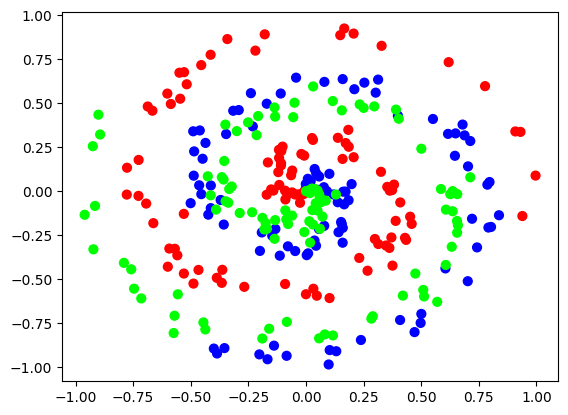

In [39]:
# generate data for a classification task
X, y = spiral_data(samples=100, classes=3)

# convert dataset to pytorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# visualize dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')


In [40]:
# Define the model
model = MyModel()

# Loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-7)
# optimizer = optim.SGD(model.parameters(), lr=0.01)


In [41]:
# Train in loop
for epoch in range(10001):
    # Forward pass
    outputs = model(X)

    # Calculate the loss
    loss = loss_function(outputs, y)

    # Zero gradients, backward pass, and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y).float().mean()

    # Print epoch, accuracy, loss, learning rate every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Accuracy: {accuracy.item():.3f}, Loss: {loss.item():.3f}, Learning Rate: {optimizer.param_groups[0]["lr"]}')


Epoch: 0, Accuracy: 0.343, Loss: 1.117, Learning Rate: 0.001
Epoch: 100, Accuracy: 0.437, Loss: 1.056, Learning Rate: 0.001
Epoch: 200, Accuracy: 0.407, Loss: 1.036, Learning Rate: 0.001
Epoch: 300, Accuracy: 0.430, Loss: 1.014, Learning Rate: 0.001
Epoch: 400, Accuracy: 0.440, Loss: 0.991, Learning Rate: 0.001
Epoch: 500, Accuracy: 0.523, Loss: 0.966, Learning Rate: 0.001
Epoch: 600, Accuracy: 0.570, Loss: 0.938, Learning Rate: 0.001
Epoch: 700, Accuracy: 0.613, Loss: 0.909, Learning Rate: 0.001
Epoch: 800, Accuracy: 0.630, Loss: 0.878, Learning Rate: 0.001
Epoch: 900, Accuracy: 0.657, Loss: 0.845, Learning Rate: 0.001
Epoch: 1000, Accuracy: 0.680, Loss: 0.811, Learning Rate: 0.001
Epoch: 1100, Accuracy: 0.683, Loss: 0.778, Learning Rate: 0.001
Epoch: 1200, Accuracy: 0.700, Loss: 0.747, Learning Rate: 0.001
Epoch: 1300, Accuracy: 0.700, Loss: 0.717, Learning Rate: 0.001
Epoch: 1400, Accuracy: 0.707, Loss: 0.691, Learning Rate: 0.001
Epoch: 1500, Accuracy: 0.717, Loss: 0.667, Learning 

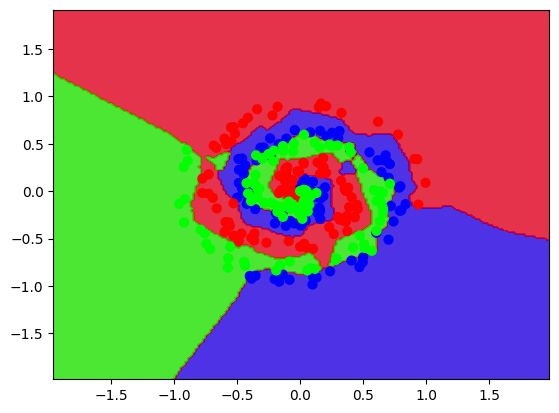

In [42]:
# create meshgrid of points covering the feature space
h = 0.02
# determine min and max values for x,y axes
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# create meshgrid of points with spacing h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# convert meshgrid to torch tensor
meshgrid_points = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# pass meshgrid points through model
with torch.no_grad():
  # forward pass through first dense
  z1 = model.dense1(meshgrid_points)
  # apply relu activation
  a1 = torch.relu(z1)
  # forward pass through second dense
  z2 = model.dense2(a1)
  # compute softmax probabilities for each class
  exp_scores = torch.exp(z2 - torch.max(z2, axis=1, keepdim=True).values)
  probs = exp_scores / torch.sum(exp_scores, axis=1, keepdim=True)

# predictions
# determine predicted class for each point in meshgrid
_, predictions = torch.max(probs, axis=1)
# reshape predictions to match shape of meshgrid
Z = predictions.numpy().reshape(xx.shape)

# plot decision boundary based on predictions
plt.contourf(xx, yy, Z, cmap='brg', alpha=0.8)

# plot original data on top of decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
# plot limits set to match extent of meshgrid
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()


In [34]:
#@markdown <font color='#e59454'>Run to See Answer!</font>

print("\n Both optimizers perform similarly, but Adam with a learning rate of 0.001 will convergence faster.")



 Both optimizers perform similarly, but Adam with a learning rate of 0.001 will convergence faster.


**Question**: What happens if you add another hidden layer with 128 neurons to the neural network model?

In [43]:
# custom NN inheriting from nn.Module
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()
    # first dense (fully connected) layer with 2 input features, 64 output neurons
    self.dense1 = nn.Linear(2, 64)
    # define activation function (ReLU) for first hidden layer
    self.relu1 = nn.ReLU()
    self.dense1_2 = nn.Linear(64, 128)
    # define activation function (ReLU) for first hidden layer
    self.relu1_2 = nn.ReLU()
    # # second desne layer with 64 input neurons, 3 output neurons
    self.dense2 = nn.Linear(128, 3)

  # forward pass
  # computes output of model given input data x
  def forward(self, x):
    # pass input x through first dense layer
    x = self.dense1(x)
    # apply ReLU activation function to output of first dense layer
    x = self.relu1(x)
    # pass input x through first dense layer
    x = self.dense1_2(x)
    # apply ReLU activation function to output of first dense layer
    x = self.relu1_2(x)
    # pass output of ReLU activation function through second dense layer
    x = self.dense2(x)
    # return output of second dense layer
    return x


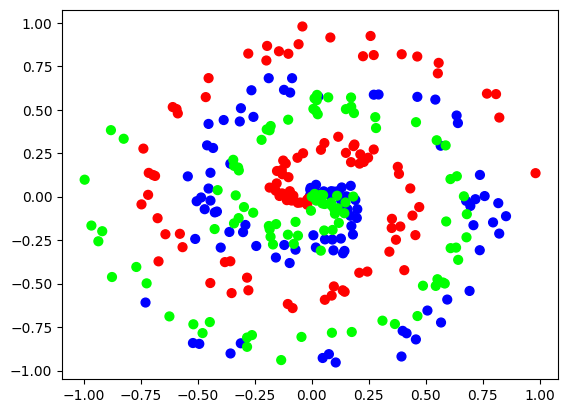

In [44]:
# generate data for a classification task
X, y = spiral_data(samples=100, classes=3)

# convert dataset to pytorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# visualize dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')


In [45]:
# Define the model
model = MyModel()

# Loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.05, weight_decay=5e-7)

In [46]:
# Train in loop
for epoch in range(10001):
    # Forward pass
    outputs = model(X)

    # Calculate the loss
    loss = loss_function(outputs, y)

    # Zero gradients, backward pass, and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y).float().mean()

    # Print epoch, accuracy, loss, learning rate every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Accuracy: {accuracy.item():.3f}, Loss: {loss.item():.3f}, Learning Rate: {optimizer.param_groups[0]["lr"]}')


Epoch: 0, Accuracy: 0.300, Loss: 1.107, Learning Rate: 0.05
Epoch: 100, Accuracy: 0.863, Loss: 0.301, Learning Rate: 0.05
Epoch: 200, Accuracy: 0.897, Loss: 0.216, Learning Rate: 0.05
Epoch: 300, Accuracy: 0.897, Loss: 0.202, Learning Rate: 0.05
Epoch: 400, Accuracy: 0.903, Loss: 0.200, Learning Rate: 0.05
Epoch: 500, Accuracy: 0.920, Loss: 0.187, Learning Rate: 0.05
Epoch: 600, Accuracy: 0.927, Loss: 0.172, Learning Rate: 0.05
Epoch: 700, Accuracy: 0.917, Loss: 0.186, Learning Rate: 0.05
Epoch: 800, Accuracy: 0.943, Loss: 0.141, Learning Rate: 0.05
Epoch: 900, Accuracy: 0.937, Loss: 0.138, Learning Rate: 0.05
Epoch: 1000, Accuracy: 0.943, Loss: 0.129, Learning Rate: 0.05
Epoch: 1100, Accuracy: 0.943, Loss: 0.124, Learning Rate: 0.05
Epoch: 1200, Accuracy: 0.947, Loss: 0.124, Learning Rate: 0.05
Epoch: 1300, Accuracy: 0.943, Loss: 0.156, Learning Rate: 0.05
Epoch: 1400, Accuracy: 0.943, Loss: 0.138, Learning Rate: 0.05
Epoch: 1500, Accuracy: 0.950, Loss: 0.130, Learning Rate: 0.05
Epoc

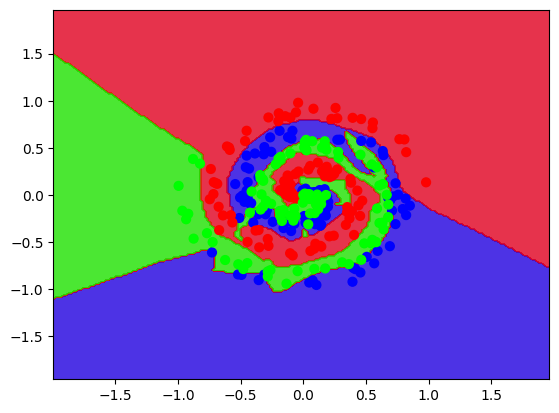

In [49]:
# create meshgrid of points covering the feature space
h = 0.02
# determine min and max values for x,y axes
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# create meshgrid of points with spacing h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# convert meshgrid to torch tensor
meshgrid_points = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# pass meshgrid points through model
with torch.no_grad():
  # forward pass through first dense
  z1 = model.dense1(meshgrid_points)
  # apply relu activation
  a1 = torch.relu(z1)
   # forward pass through first dense
  z1_2 = model.dense1_2(a1)
  # apply relu activation
  a1_2 = torch.relu(z1_2)
  # forward pass through second dense
  z2 = model.dense2(a1_2)
  # compute softmax probabilities for each class
  exp_scores = torch.exp(z2 - torch.max(z2, axis=1, keepdim=True).values)
  probs = exp_scores / torch.sum(exp_scores, axis=1, keepdim=True)

# predictions
# determine predicted class for each point in meshgrid
_, predictions = torch.max(probs, axis=1)
# reshape predictions to match shape of meshgrid
Z = predictions.numpy().reshape(xx.shape)

# plot decision boundary based on predictions
plt.contourf(xx, yy, Z, cmap='brg', alpha=0.8)

# plot original data on top of decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
# plot limits set to match extent of meshgrid
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()


In [50]:
#@markdown <font color='#e59454'>Run to See Answer!</font>

print("\n Adding another hidden layer with 128 neurons to the neural network will increase the model's capacity to learn more complex patterns in the data. \n Adding the extra layer will improve the performance slightly, but the original model already achieves high accuracy (~0.970).")



 Adding another hidden layer with 128 neurons to the neural network will increase the model's capacity to learn more complex patterns in the data. 
 Adding the extra layer will improve the performance slightly, but the original model already achieves high accuracy (~0.970).


**Question**: How does using a weight decay of 0.001 affect the training of the neural network model?

In [51]:
#@markdown <font color='#e59454'>Run to See Answer!</font>

print("\n Using a weight decay of 0.001 (up from the original 5e-7) will increase regularization, penalizing large weights more heavily. \n Training accuracy may decrease slightly, but will improve generalization.")



 Using a weight decay of 0.001 (up from the original 5e-7) will increase regularization, penalizing large weights more heavily. 
 Training accuracy may decrease slightly, but will improve generalization.
